Description:
In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.

The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 32561 rows and 15 features that can be downloaded here.

The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.

#Import necessary libraries 

In [1]:
import pandas as pd
import seaborn as sns
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier
import numpy as np

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
#!pip install -U prettytable

In [4]:
#!pip install catboost

In [5]:
#!pip install imblearn
#!pip install mlxtend

In [6]:
from imblearn.combine import SMOTETomek

In [7]:
from mlxtend.plotting import plot_confusion_matrix

In [8]:
from sklearn.metrics import auc, confusion_matrix, plot_confusion_matrix, classification_report, roc_curve, roc_auc_score

In [9]:
#Loading dataset 
df=pd.read_csv("adult.csv")

Step 1: Descriptive analysis

In [10]:
#top 5 rows 
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [11]:
#bottom 5 rows 
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
df.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
18327,17,Private,204018,11th,7,Never-married,Sales,Unmarried,White,Male,0,0,15,United-States,<=50K
32129,37,Private,180342,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,45,United-States,<=50K
1443,54,Private,188136,Bachelors,13,Divorced,Sales,Not-in-family,White,Female,0,1408,38,United-States,<=50K
22764,25,Private,232914,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,Black,Female,0,0,38,United-States,<=50K
23764,34,Private,113838,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,>50K


In [13]:
#finding shape of dataframne
df.shape

(32561, 15)

In [14]:
#Numeric Features :
Numeric_Features=[col for col in df.columns if df[col].dtypes!='O']
Numeric_Features

['age',
 'fnlwgt',
 'education.num',
 'capital.gain',
 'capital.loss',
 'hours.per.week']

In [15]:
Categorical_Features=[col for col in df.columns if df[col].dtypes=='O']
Categorical_Features

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

In [16]:
#finding duplicate records insdie dataframe 
df.duplicated().sum()

24

In [17]:
#drop duplicates 
df.drop_duplicates(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education.num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital.gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital.loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [20]:
#dataframe showing 0 null values since we have some data missing in the form of ? lets find %of data having missing values in ?
# Check for null values
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [21]:
# Check for '?' in dataset
round((df.isin(['?']).sum() / df.shape[0])
      * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [22]:
df.replace({'?':np.NaN},inplace=True)

In [23]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [24]:
#We have missing data in workclass,occupation and native.country column

In [25]:
#Chekcing the distribution of our target feature our target feature is income 
df['income'].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

Observation :It is clearly visible our dataset is imbalanced we have to handle it 

Step 2: Exploratory Data Analysis

Text(0.5, 1.0, 'Cardinality')

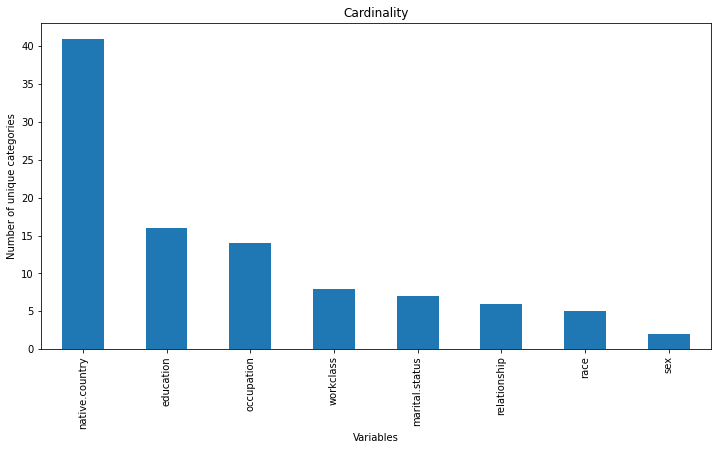

In [26]:
#Finding the cardinality of categorical Features inside dataframe
df[['workclass','education','marital.status','occupation','relationship','race','sex','native.country']].nunique().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

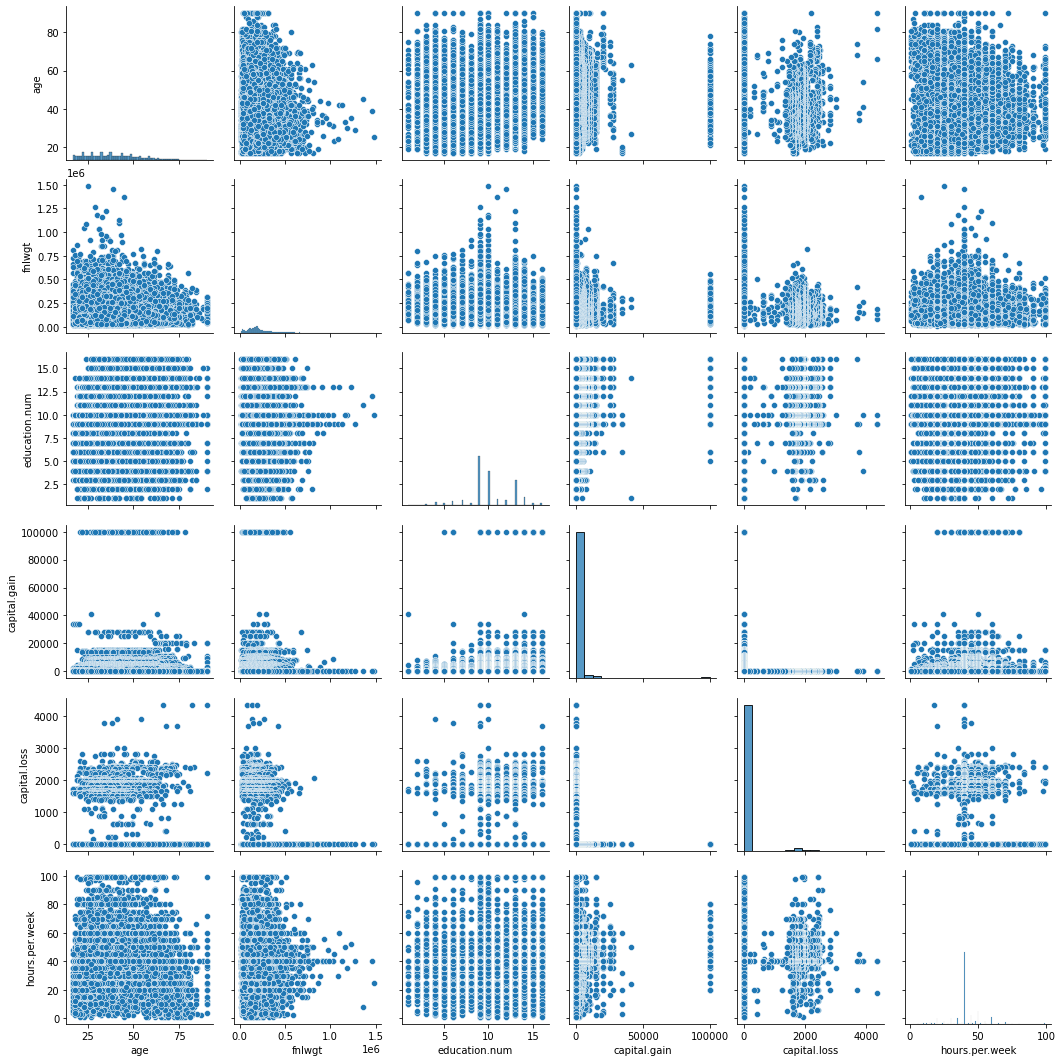

In [27]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education.num'}>,
        <AxesSubplot:title={'center':'capital.gain'}>],
       [<AxesSubplot:title={'center':'capital.loss'}>,
        <AxesSubplot:title={'center':'hours.per.week'}>]], dtype=object)

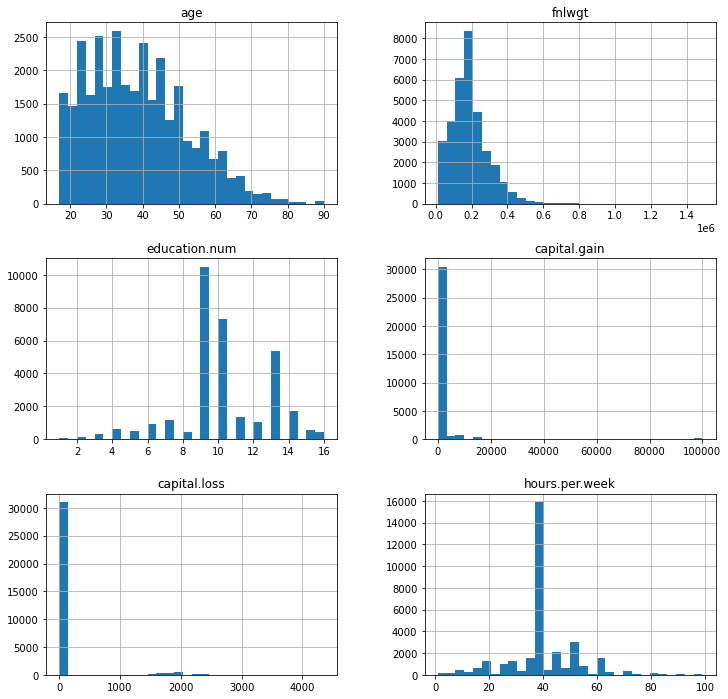

In [28]:
#lets see the univariate analysis 
#Finding the normal distribution of Numerical Features inside the dataframe 
df.hist(bins=30, figsize=(12,12))

In [29]:
#our numeric features are not normely distributed .Since we are dealing with classification problem we will not take care about it 

Workclass Distribution :


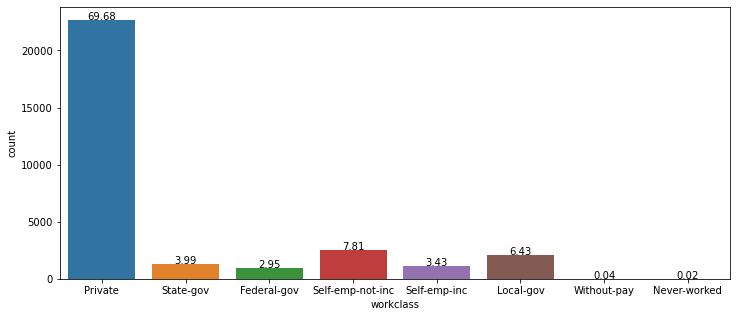

In [30]:
plt.figure(figsize=(12,5))
total = float(len(df['income']) )
ax = sns.countplot(x="workclass", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

Obsearvation:from workclass without pay and nevwer worked make no sense we can drop them

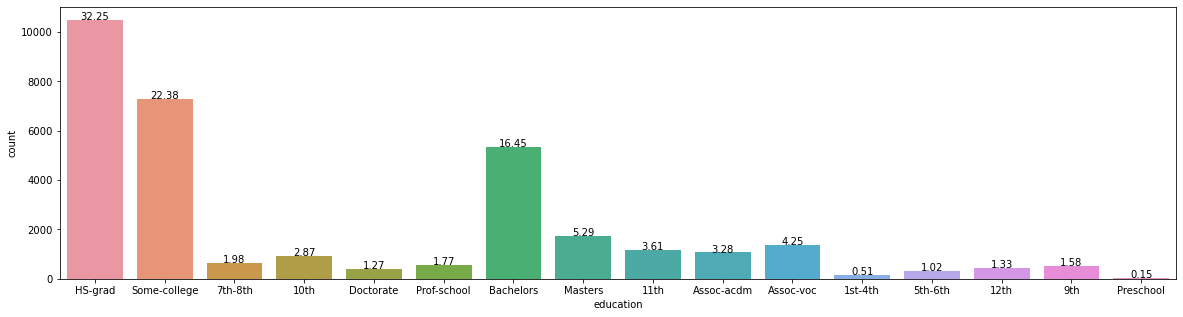

In [31]:
plt.figure(figsize=(20,5))
total = float(len(df['income']) )
ax = sns.countplot(x="education", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

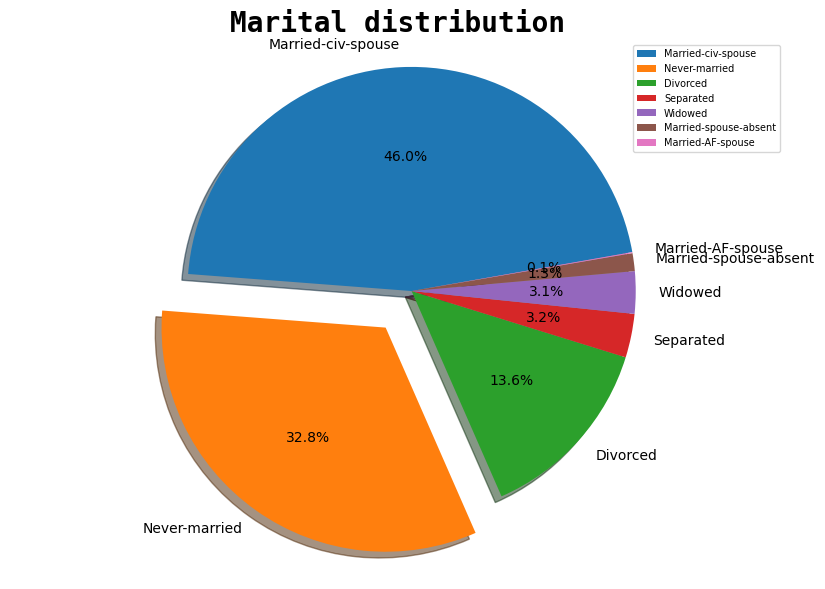

In [32]:
# Creating a pie chart for 'Marital status'
marital = df['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

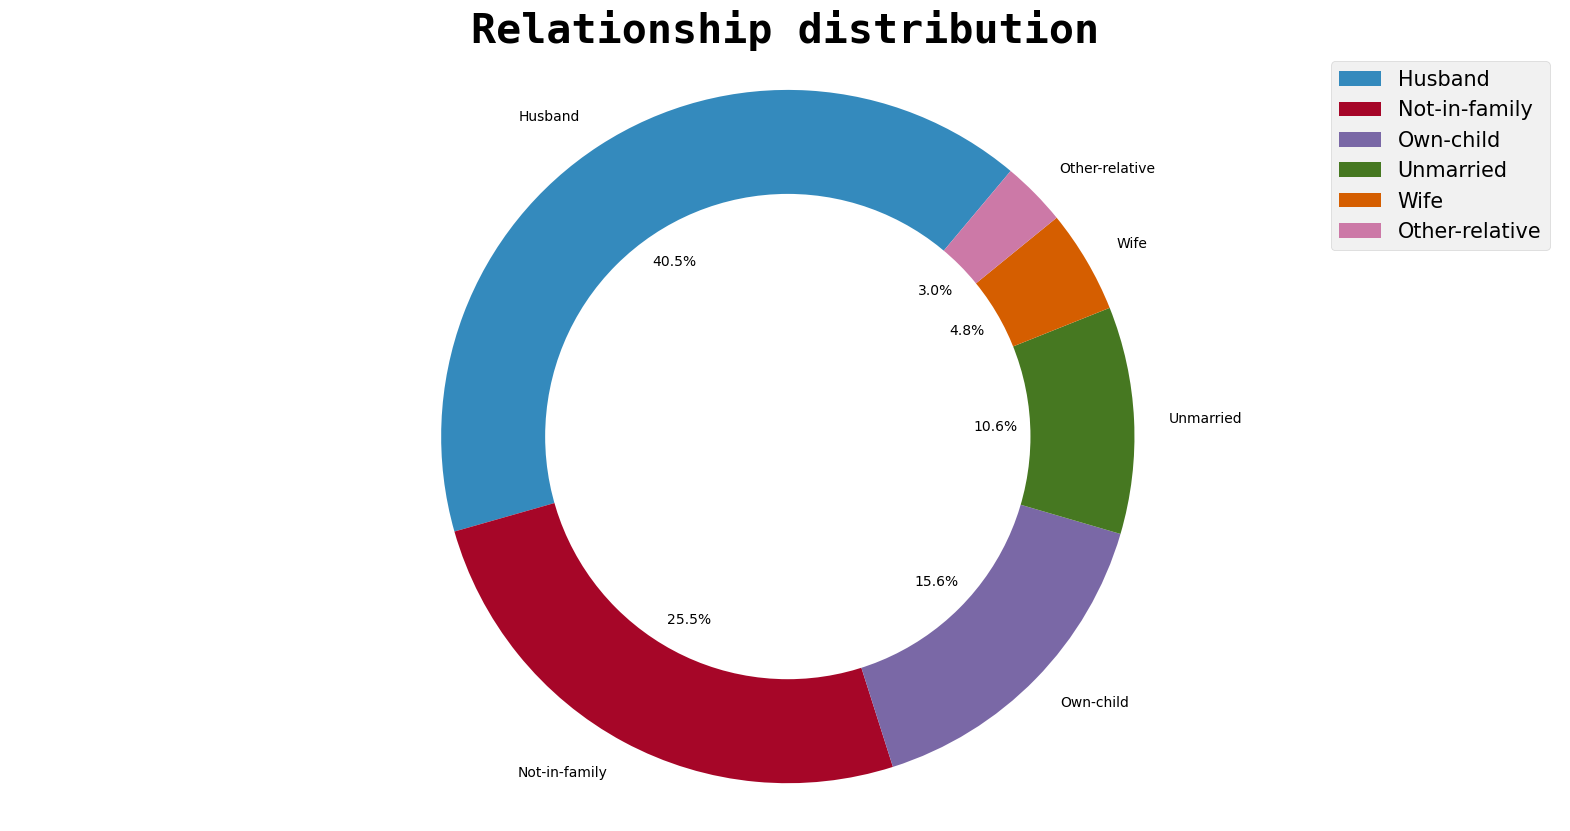

In [33]:
# Creating a donut chart for 'Age'
relation = df['relationship'].value_counts()

plt.style.use('bmh')
plt.figure(figsize=(20, 10))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 30, 'fontweight': 'bold'})
plt.axis('equal')
plt.legend(prop={'size': 15})
plt.show()

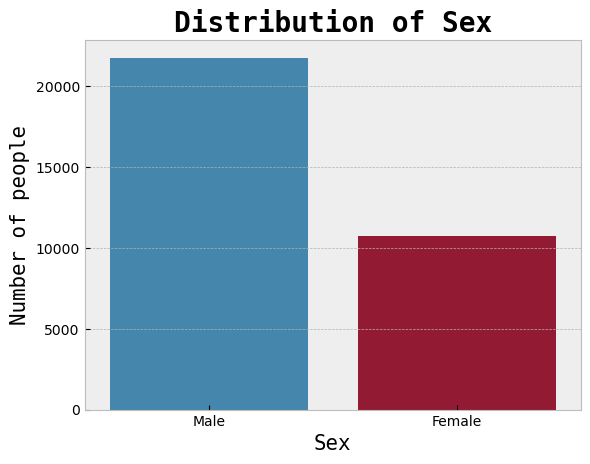

In [34]:
# Creating a barplot for 'Sex'
sex = df['sex'].value_counts()
sns.barplot(x=sex.index,y=sex.values)
plt.title('Distribution of Sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)

In [35]:
#!pip install sqarify

Obesravation :In race distribution we have majority of White and Blck category

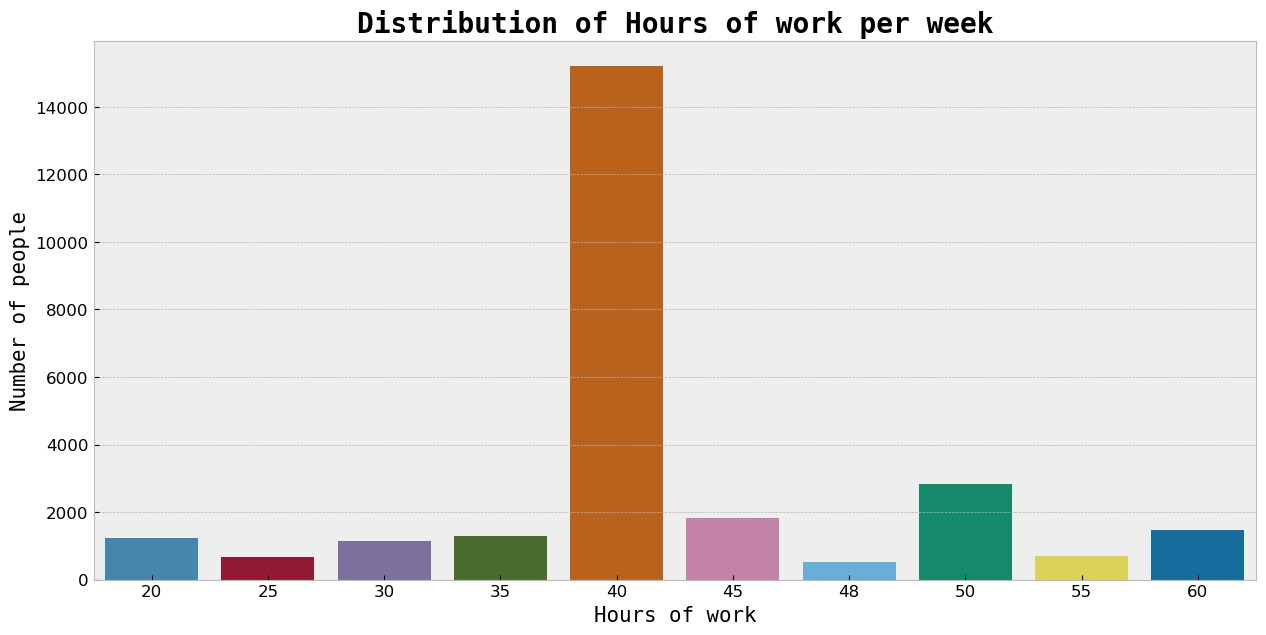

In [36]:
# Creating a barplot for 'Hours per week'
hours = df['hours.per.week'].value_counts().head(10)

plt.style.use('bmh')
plt.figure(figsize=(15, 7))
sns.barplot(x=hours.index, y=hours.values)
plt.title('Distribution of Hours of work per week', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Hours of work', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

Bivariate Analysis:

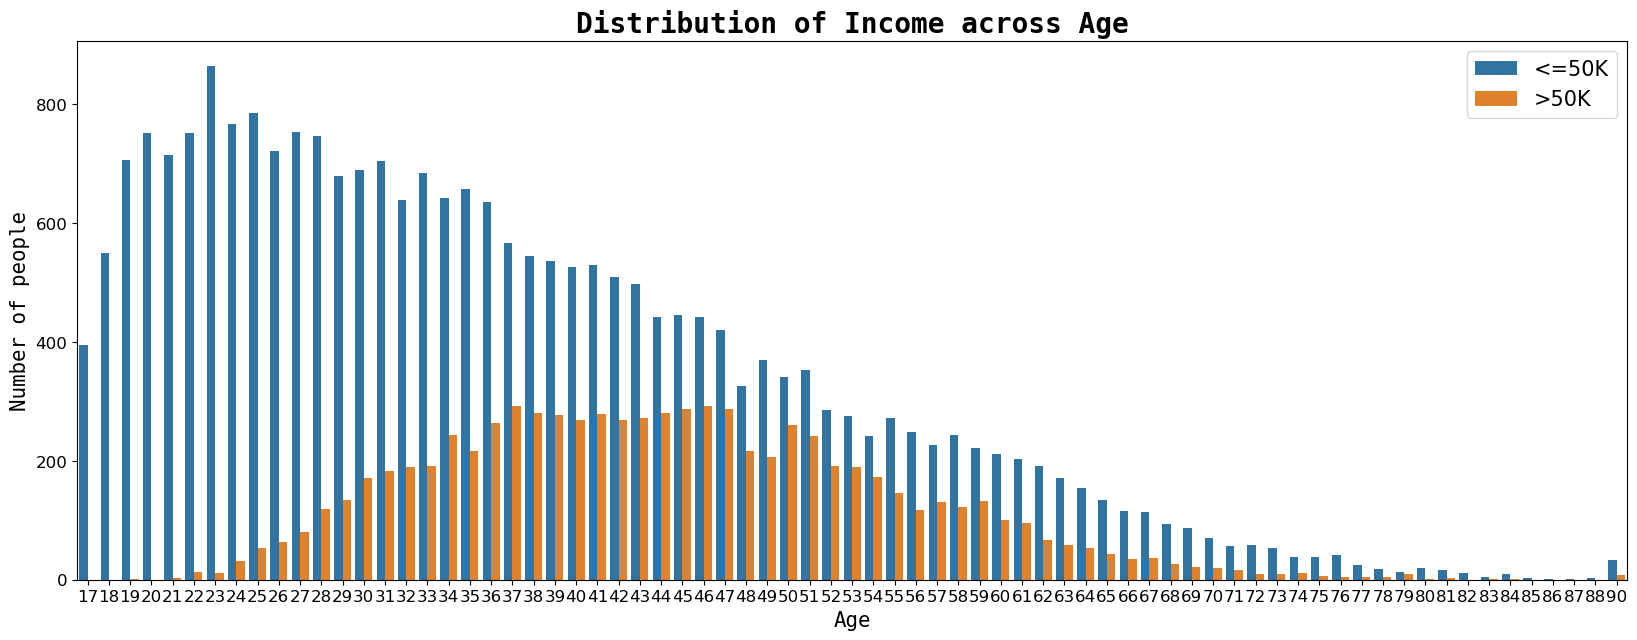

In [37]:
# Creating a countplot of income across age
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['age'], hue=df['income'])
plt.title('Distribution of Income across Age', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Age', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

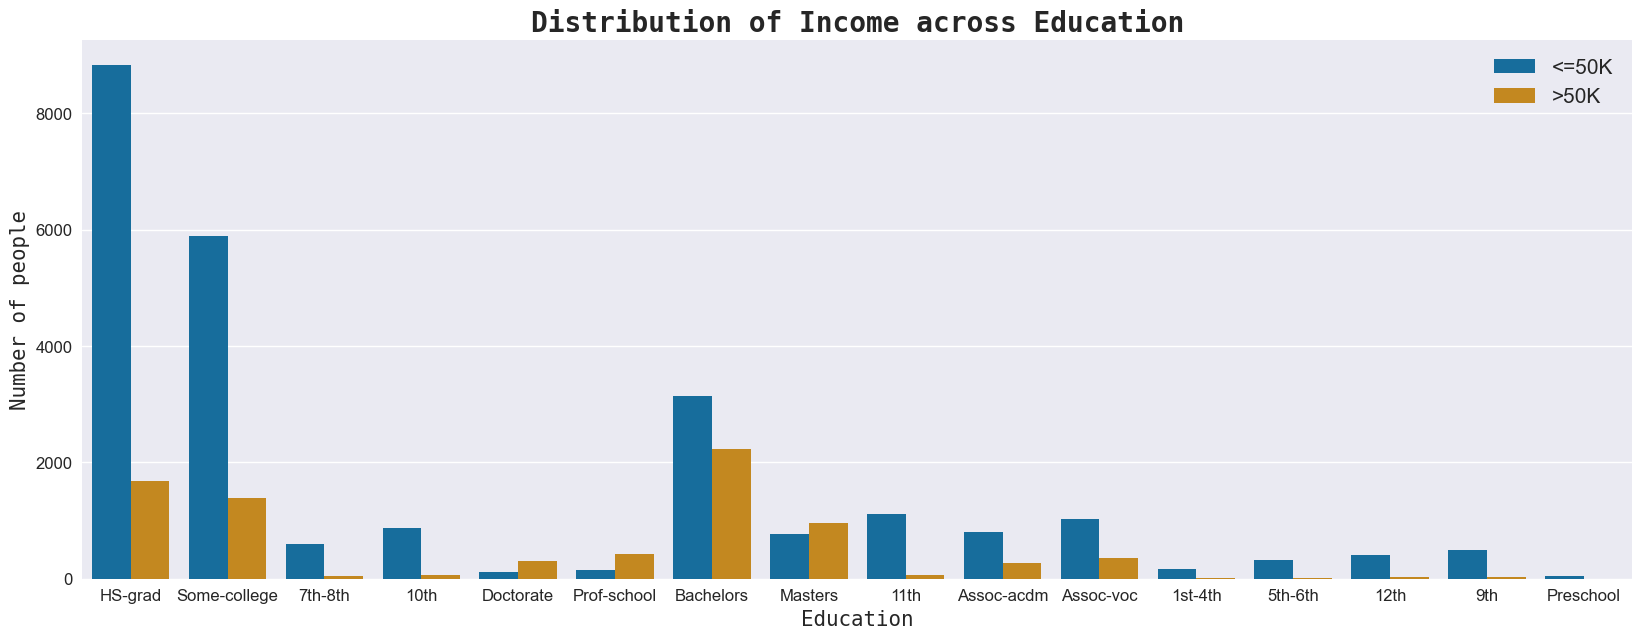

In [38]:
# Creating a countplot of income across education
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['education'],
              hue=df['income'], palette='colorblind')
plt.title('Distribution of Income across Education', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Education', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

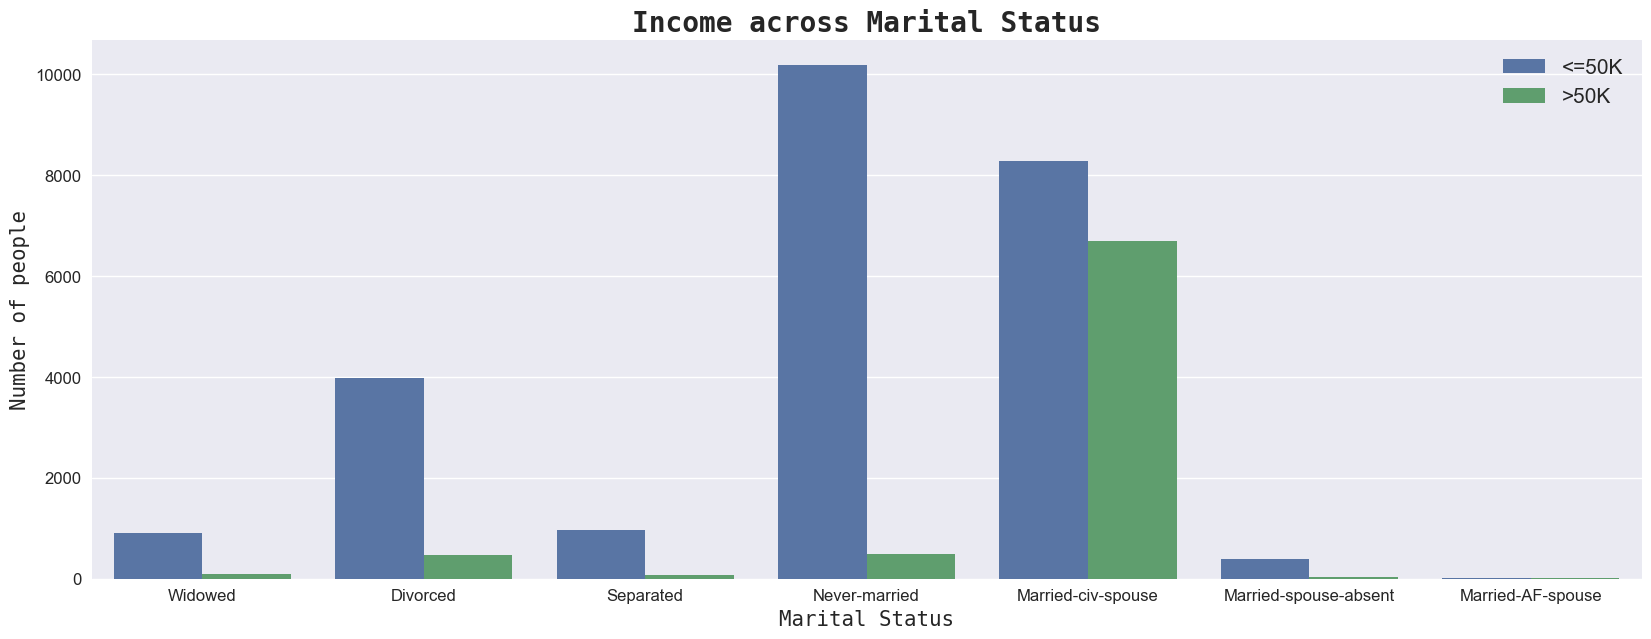

In [39]:
# Creating a countplot of income across Marital Status
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['marital.status'], hue=df['income'])
plt.title('Income across Marital Status', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

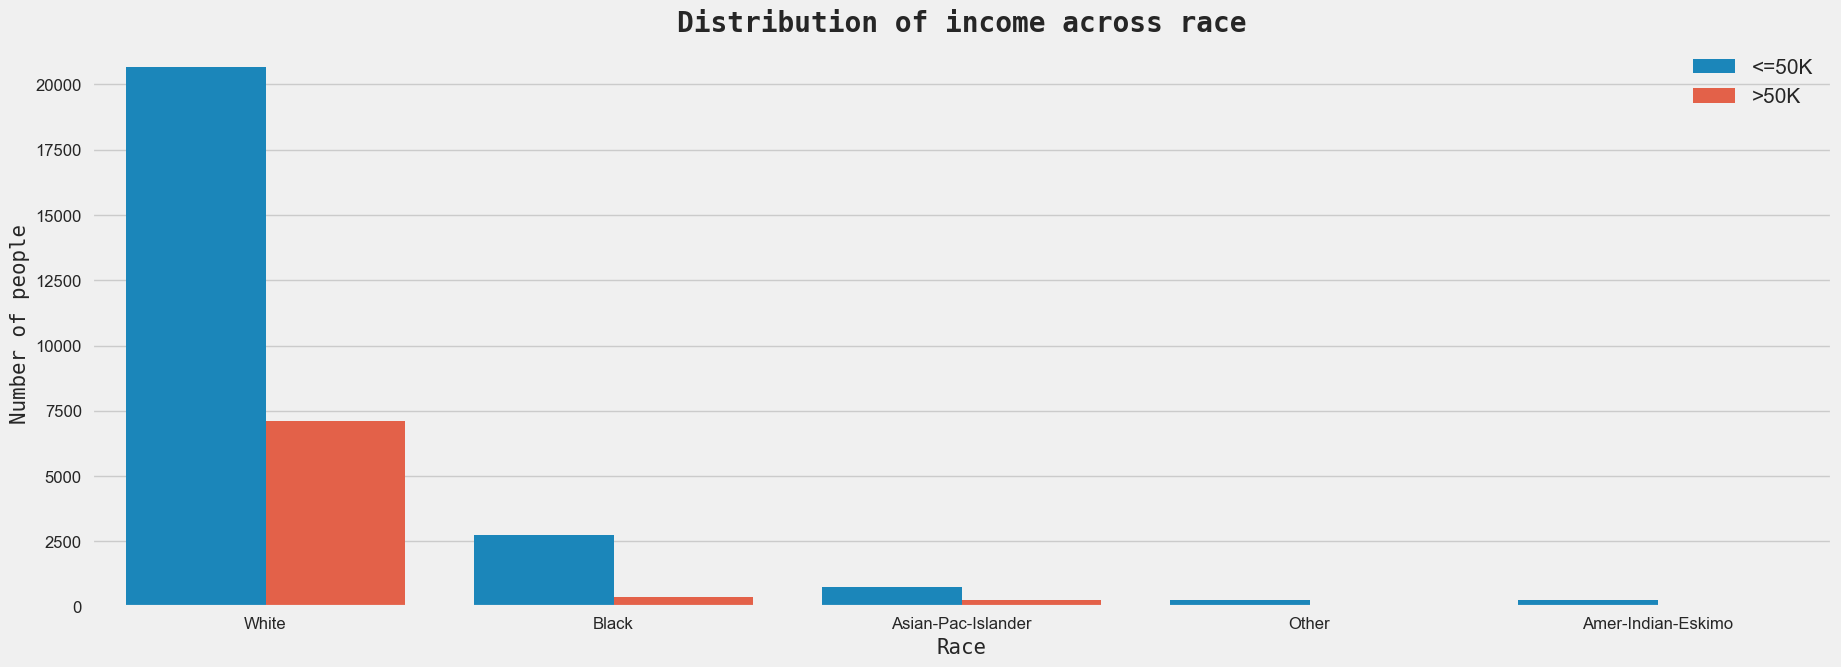

In [40]:
# Creating a countplot of income across race
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(x=df['race'], hue=df['income'])
plt.title('Distribution of income across race', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Race', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


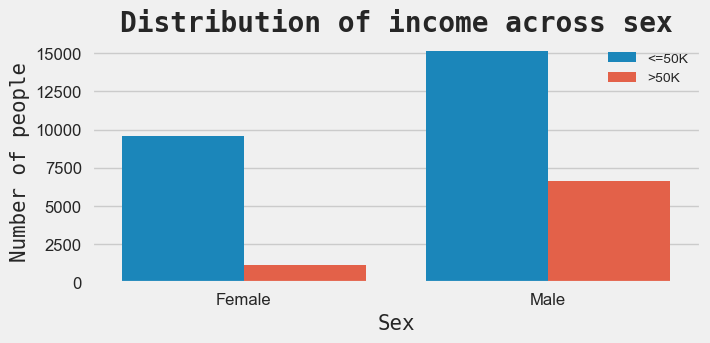

In [41]:
# Creating a countplot of income across sex
plt.style.use('fivethirtyeight')
plt.figure(figsize=(7, 3))
sns.countplot(x=df['sex'], hue=df['income'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Number of people', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.savefig('bi3.png')
plt.show()


Multivariate Analusis:

In [42]:
df.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515
fnlwgt,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898
education.num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422
capital.gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408
capital.loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229
hours.per.week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000


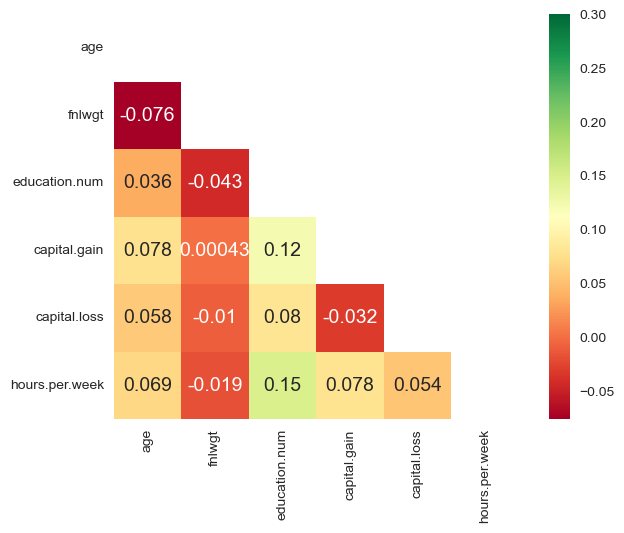

In [43]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,
                     annot=True, cmap='RdYlGn')
plt.savefig('multi2.png')
plt.show()

Data Preprocessing:

In [44]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [45]:
df.isna().sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native.country     582
age                  0
fnlwgt               0
education            0
education.num        0
marital.status       0
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

In [46]:
#We have missing values in categorical features 

In [47]:
#Since education and education.num represents same information we can drop education from dataset 
df=df.drop('education',axis=1)

In [48]:
df.shape

(32537, 14)

In [49]:
#Similarly fnlwgt feature also does not representing much information in dataset and not relevant to make prediction we can drop it 
df=df.drop('fnlwgt',axis=1)

In [50]:
df.shape

(32537, 13)

In [51]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [52]:
df['marital.status'].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [53]:
df['workclass'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Data Preprocessing :

In [54]:
df1=df.replace({'Federal-gov':"other",'Without-pay':"other",'Never-worked':"other"})

In [55]:
df1['workclass'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
other                 981
Name: workclass, dtype: int64

In [56]:
df1['marital.status'].value_counts()

Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64

In [57]:
df2=df1.replace({'Married-spouse-absent':"other",'Married-AF-spouse':"other"})

In [58]:
df2['marital.status'].value_counts()

Married-civ-spouse    14970
Never-married         10667
Divorced               4441
Separated              1025
Widowed                 993
other                   441
Name: marital.status, dtype: int64

In [59]:
df2['race'].value_counts()

White                 27795
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [60]:
df2['occupation'].value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

In [61]:
df2['relationship'].value_counts()

Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [62]:
#fill missing values from native.country 
from sklearn.impute import SimpleImputer

In [63]:
df=pd.read_csv("New dataset.csv")

In [64]:
df.head()

,Unnamed: 0,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [65]:
df=df.drop("Unnamed: 0",axis=1)

In [66]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [67]:
df.isna().sum().sort_values(ascending=False)

occupation        1843
workclass         1836
native.country     582
age                  0
education.num        0
marital.status       0
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
income               0
dtype: int64

df1=df.replace({'Federal-gov':"other",'Without-pay':"other",'Never-worked':"other"})

In [68]:
df['workclass'].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
other                 981
Name: workclass, dtype: int64

df2=df1.replace({'Married-spouse-absent':"other",'Married-AF-spouse':"other"})

In [69]:
df['marital.status'].value_counts()

Married-civ-spouse    14970
Never-married         10667
Divorced               4441
Separated              1025
Widowed                 993
other                   441
Name: marital.status, dtype: int64

In [70]:
Countries=np.array(df['native.country'].unique())#it returns array of countries so that we can delete United States from it 
Countries

array(['United-States', nan, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [71]:
Countries=np.delete(Countries,0) 
Countries #Remove United States from Countries and store again in countries make list in one group "Other"

array([nan, 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan', 'India',
       'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [72]:
df['native.country'].replace(Countries, 'Other', inplace = True)

In [73]:
df['native.country'].value_counts()

United-States    29153
Other             3384
Name: native.country, dtype: int64

In [74]:
df['native.country'].isna().sum()

0

Splitting data set into target and features 

In [75]:
df.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [76]:
target = 'income'
num_features = ['age', 'capital.gain', 'capital.loss', 'hours.per.week', 'education.num']
cat_features = ['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
features = df.columns.tolist()
features.remove(target)
X = df[features]
y = df[target]

In [77]:
X.shape

(32537, 12)

In [78]:
y.shape

(32537,)

In [79]:
#Label Encoding to our target feature 
label_encoder=LabelEncoder()

In [80]:
y=label_encoder.fit_transform(y)

In [81]:
num_features=[ col for col in X.columns if X[col].dtypes!='O']
cat_features=[ col for col in X.columns if X[col].dtypes=='O']
print(num_features)
print(cat_features)


['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


EXPERIMENT 1:

In [82]:
#Pipeline 1 use of Robust scaler to numeric_features and onehot encoder to categorical Features
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Other')),
    ('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])

In [83]:
X_scaled_Standard=preprocessor.fit_transform(X)

In [84]:
smt=SMOTETomek(random_state=42,n_jobs=-1)

In [85]:
X_result1,y_result1=smt.fit_resample(X_scaled_Standard,y)

In [86]:
def drawRocCurve(classifier, nameClassifier, X_test, y_test):
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # predict probabilities
    lr_probs = classifier.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('Random model: ROC AUC=%.3f' % (ns_auc))
    print(f'{nameClassifier}: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random model')
    plt.plot(lr_fpr, lr_tpr, marker='.', label=nameClassifier)
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    return lr_auc, lr_fpr, lr_tpr

In [87]:
def GridSearch(param, estimator, X=X, y=y):
    '''GridSearch function split the data for training and test sets; fit data 
    for a given model and choose the best paramethers using GridSearchCV from sklearn.
    At the end this function return score raport for the prediction'''
    # split into a training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    grid_rf = GridSearchCV(estimator, param, refit = True, verbose = 3, n_jobs=-1) 

    # fitting the model for grid search 
    grid_rf.fit(X_train, y_train) 

    # print best parameter after tuning 
    print(grid_rf.best_params_) 
    grid_rf_predictions = grid_rf.predict(X_test) 

    # print classification report 
    return classification_report(y_test, grid_rf_predictions)

In [88]:
def ConfusionMatrix(classifier, X=X, y=y, confusionMatrix = True, plotConfusionMatrix = True):
        '''ConfusionMatrix function split data, fit data to model and give 
        a prediction for a given model and data. After that draw Confusion Matrix or 
        Plot Confusion Matrix to show the score'''
        #computing the confusion matrix with each row corresponding to the true class
        if(confusionMatrix):
            print(confusion_matrix(y_test, y_pred))

        #drawing Plot Confusion Matrix
        if(plotConfusionMatrix):
            plot_confusion_matrix(classifier, X_test, y_test)  
            plt.show() 

LogisticRegression:

model score: 0.851


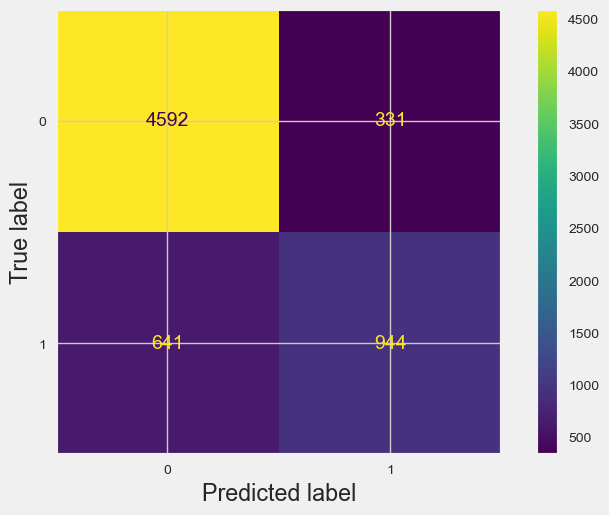

In [89]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  LogisticRegression())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
Logistic Regression: ROC AUC=0.902


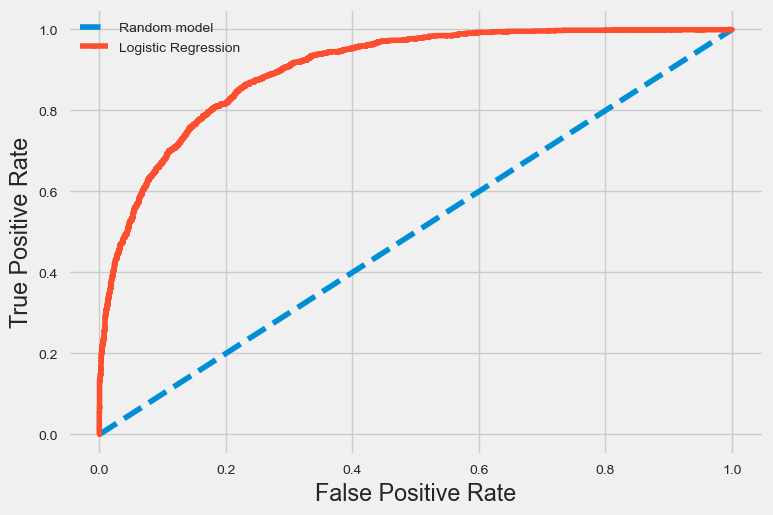

In [90]:
lr_auc_logr, lr_fpr_logr, lr_tpr_logr = drawRocCurve(clf, "Logistic Regression", X_test, y_test)

RandomForestClassifier:

model score: 0.841


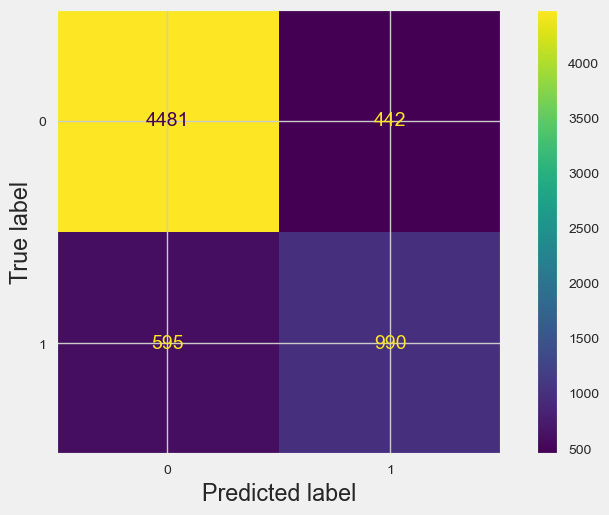

In [91]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  RandomForestClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
Random Forest: ROC AUC=0.893


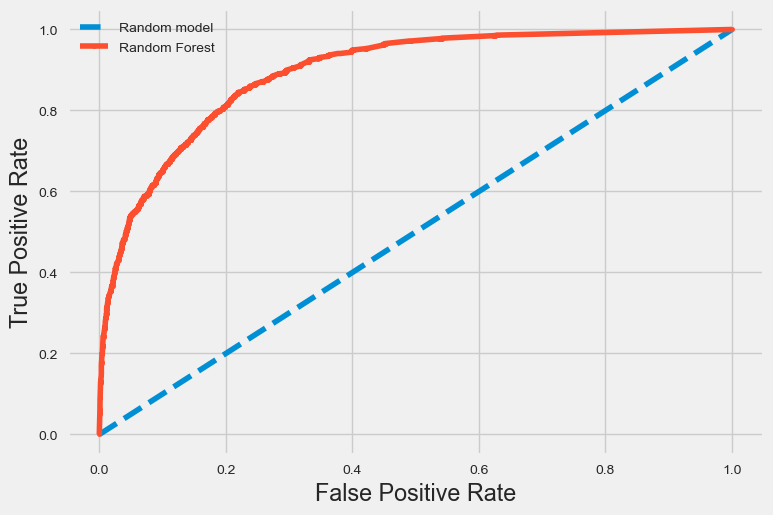

In [92]:
lr_auc_rf, lr_fpr_rf, lr_tpr_rf = drawRocCurve(clf, "Random Forest", X_test, y_test)

DecisionTreeClassifier:

model score: 0.821


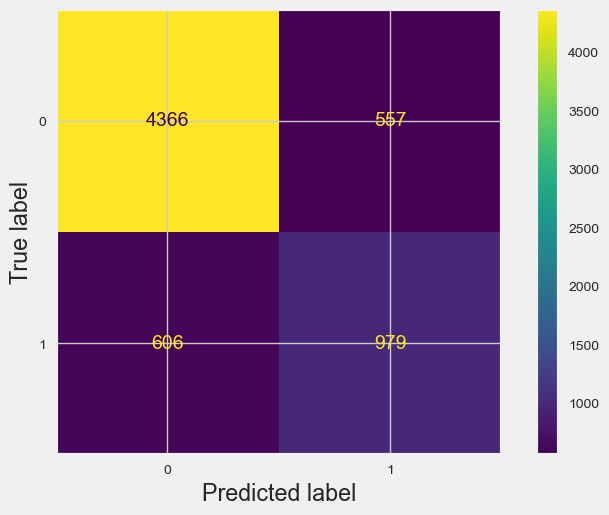

In [93]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',  DecisionTreeClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
Decion Tree Classifier: ROC AUC=0.770


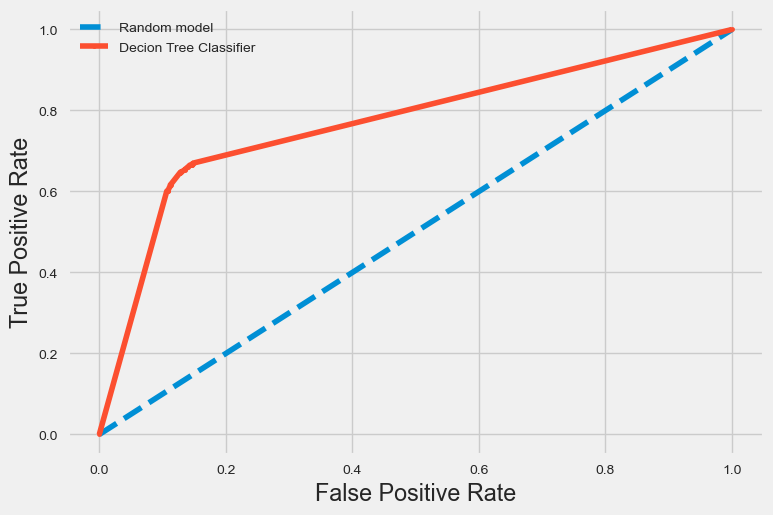

In [94]:
lr_auc_tree, lr_fpr_tree, lr_tpr_tree = drawRocCurve(clf, "Decion Tree Classifier", X_test, y_test)

KNeighborsClassifier:

model score: 0.849


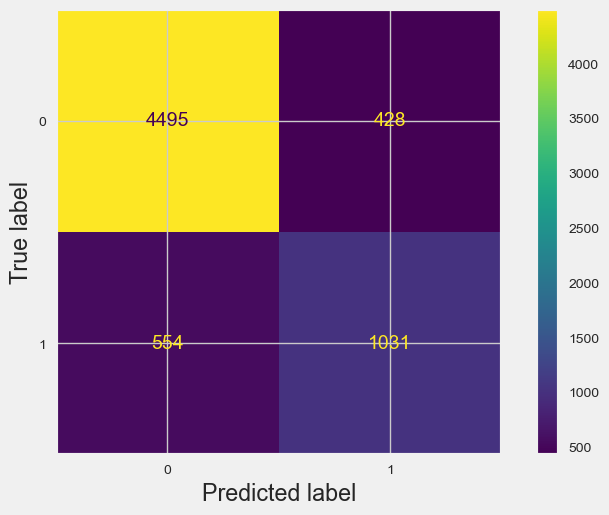

In [95]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',KNeighborsClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
KNeighboursClassifier: ROC AUC=0.882


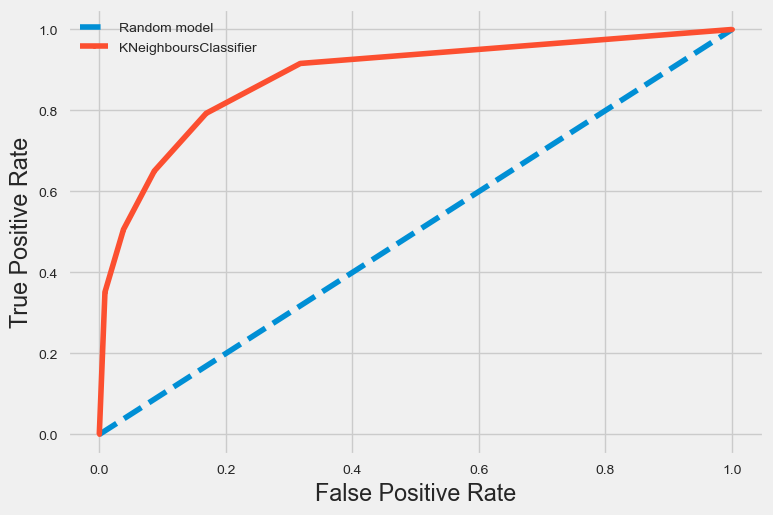

In [96]:
lr_auc_knc, lr_fpr_knc, lr_tpr_knc = drawRocCurve(clf, "KNeighboursClassifier", X_test, y_test)

GradientBoostingClassifier:

model score: 0.868


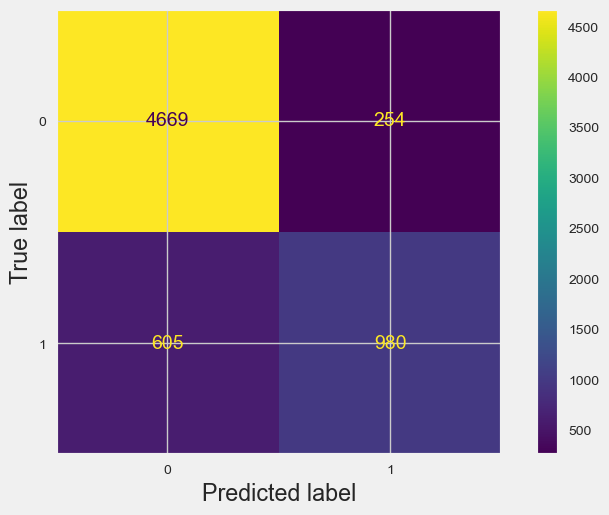

In [97]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',GradientBoostingClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
GradientBoostClassifier: ROC AUC=0.921


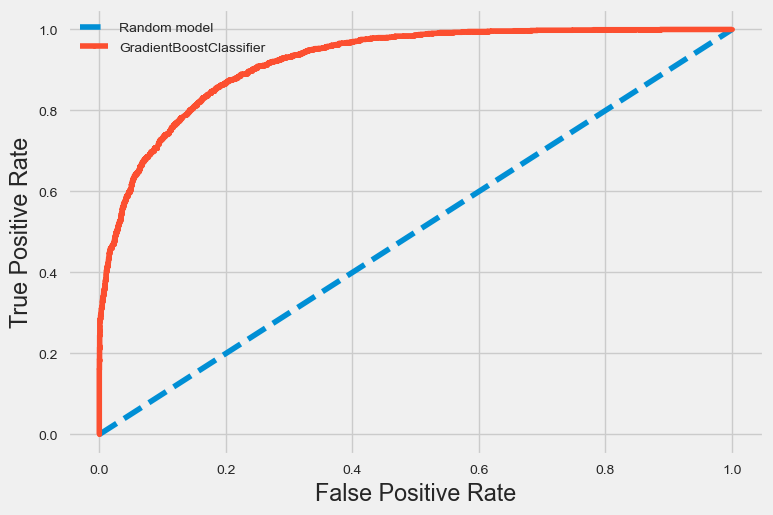

In [98]:
lr_auc_gbc, lr_fpr_gbc, lr_tpr_gbc = drawRocCurve(clf, "GradientBoostClassifier", X_test, y_test)

XGBClassifier:

model score: 0.873


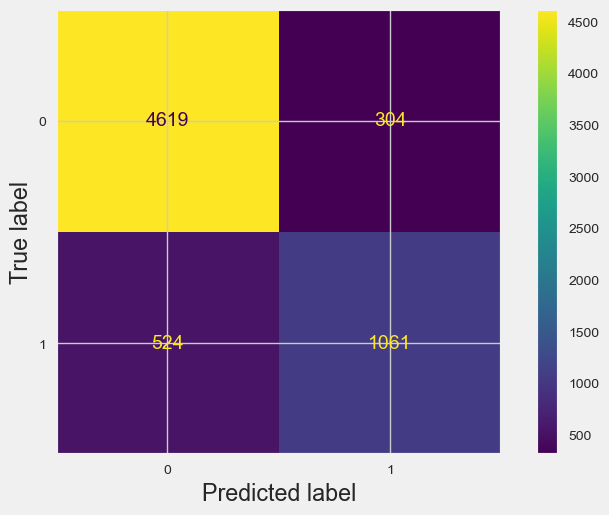

In [99]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',XGBClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
XGBClassifier: ROC AUC=0.927


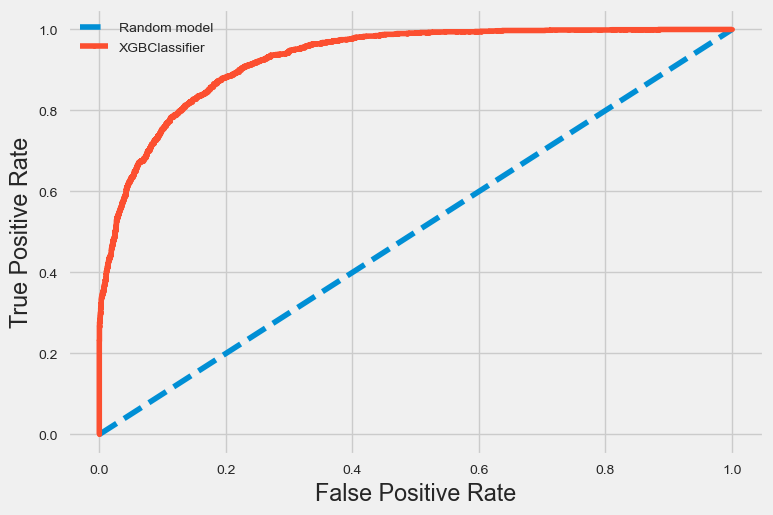

In [100]:
lr_auc_xgb, lr_fpr_xgb, lr_tpr_xgb = drawRocCurve(clf, "XGBClassifier", X_test, y_test)

AdaBoostClassifier:

model score: 0.864


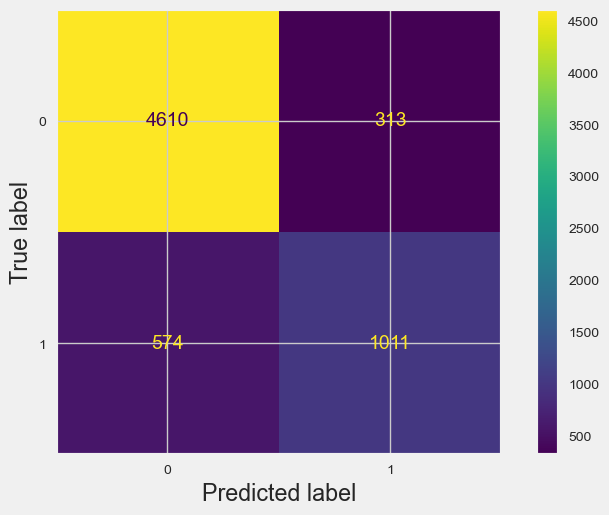

In [101]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',AdaBoostClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
AdaBoostClassifier: ROC AUC=0.916


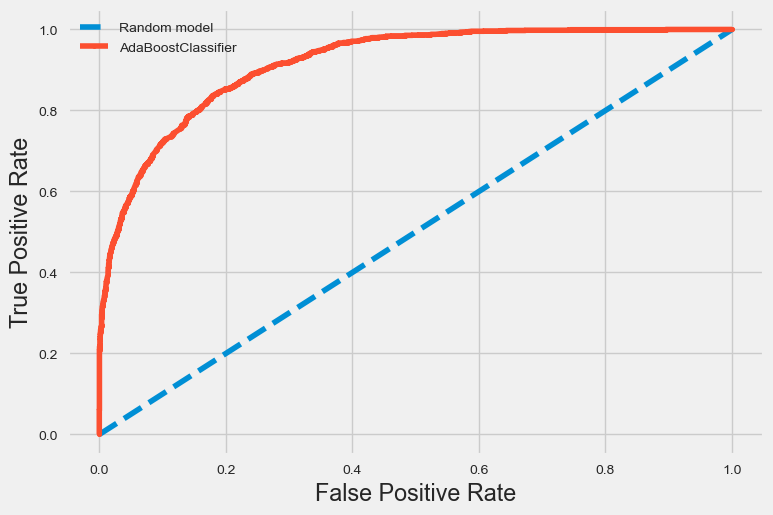

In [102]:
lr_auc_ada, lr_fpr_ada, lr_tpr_ada = drawRocCurve(clf, "AdaBoostClassifier", X_test, y_test)

CatBoostClassifier:

Learning rate set to 0.041432
0:	learn: 0.6495123	total: 261ms	remaining: 4m 20s
1:	learn: 0.6150477	total: 303ms	remaining: 2m 31s
2:	learn: 0.5811134	total: 328ms	remaining: 1m 48s
3:	learn: 0.5546460	total: 345ms	remaining: 1m 25s
4:	learn: 0.5278469	total: 362ms	remaining: 1m 11s
5:	learn: 0.5067097	total: 378ms	remaining: 1m 2s
6:	learn: 0.4863026	total: 395ms	remaining: 56s
7:	learn: 0.4676935	total: 410ms	remaining: 50.9s
8:	learn: 0.4524399	total: 426ms	remaining: 46.9s
9:	learn: 0.4399431	total: 442ms	remaining: 43.8s
10:	learn: 0.4264957	total: 463ms	remaining: 41.6s
11:	learn: 0.4155135	total: 488ms	remaining: 40.1s
12:	learn: 0.4064691	total: 510ms	remaining: 38.7s
13:	learn: 0.3984387	total: 528ms	remaining: 37.2s
14:	learn: 0.3925717	total: 544ms	remaining: 35.7s
15:	learn: 0.3854774	total: 560ms	remaining: 34.5s
16:	learn: 0.3788052	total: 577ms	remaining: 33.3s
17:	learn: 0.3735468	total: 593ms	remaining: 32.4s
18:	learn: 0.3689524	total: 609ms	remaining: 31.5s
19:	lear

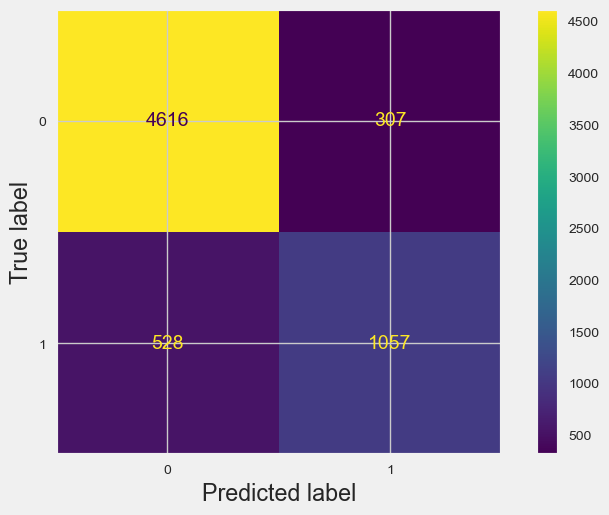

In [103]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',CatBoostClassifier())])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

ConfusionMatrix(classifier=clf, confusionMatrix=False)

Random model: ROC AUC=0.500
CatBoostClassifier: ROC AUC=0.928


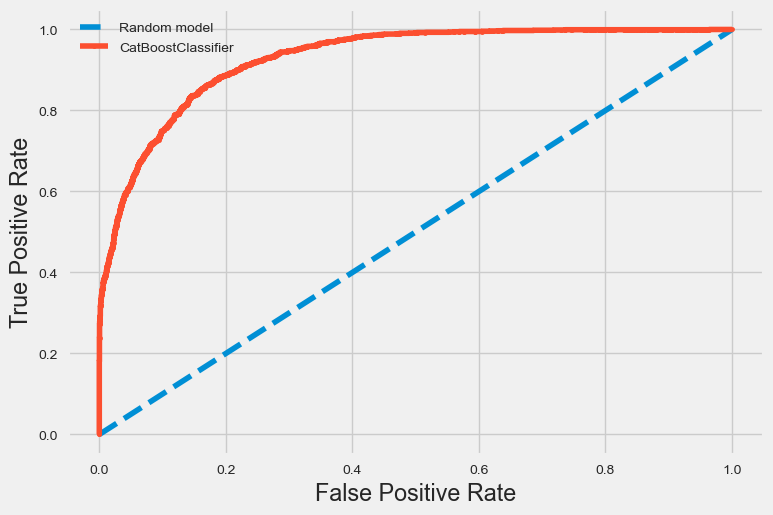

In [104]:
lr_auc_cat, lr_fpr_cat, lr_tpr_cat = drawRocCurve(clf, "CatBoostClassifier", X_test, y_test)

Overall Report

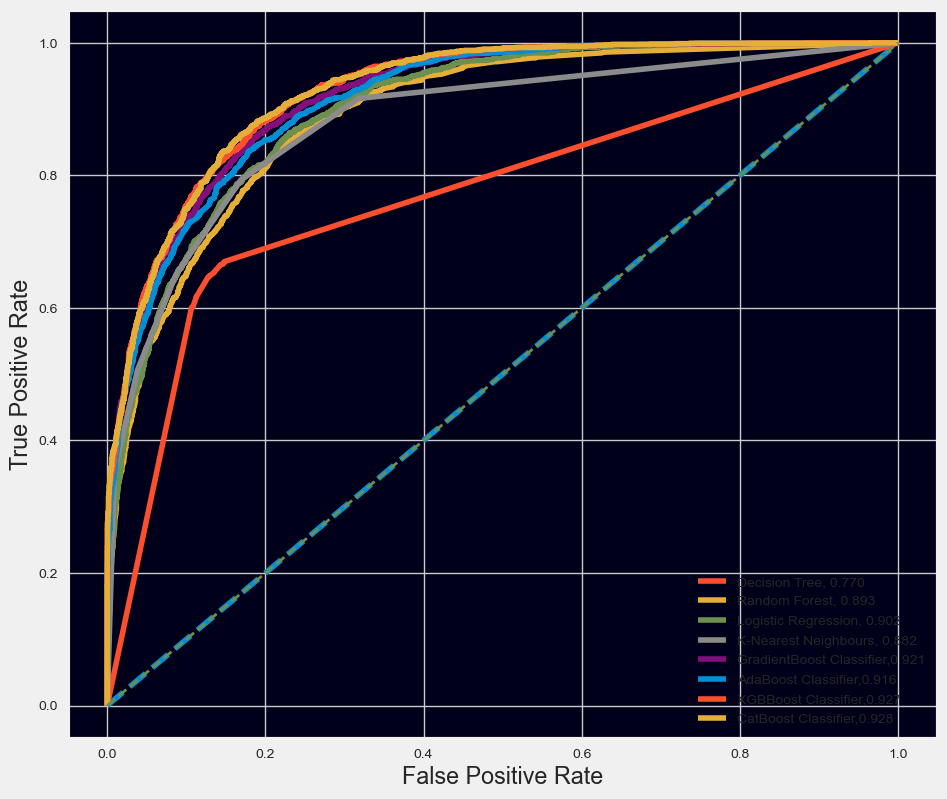

In [105]:
 # Determining the size of the drawing
fig, ax = plt.subplots(figsize=(10,9))
ax.set_facecolor((0,0,0.10))

#about Random model
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr_tree, lr_tpr_tree, label="Decision Tree, %.3f" % (lr_auc_tree))
plt.plot(lr_fpr_rf, lr_tpr_rf,  label="Random Forest, %.3f" % (lr_auc_rf))
plt.plot(lr_fpr_logr, lr_tpr_logr, label="Logistic Regression, %.3f" % (lr_auc_logr))
plt.plot(lr_fpr_knc, lr_tpr_knc, label="K-Nearest Neighbours, %.3f" % (lr_auc_knc))
plt.plot(lr_fpr_gbc,lr_tpr_gbc,label="GradientBoost Classifier,%.3f" %(lr_auc_gbc))
plt.plot(lr_fpr_ada,lr_tpr_ada,label="AdaBoost Classifier,%.3f" %(lr_auc_ada))
plt.plot(lr_fpr_xgb,lr_tpr_xgb,label="XGBBoost Classifier,%.3f" %(lr_auc_xgb))
plt.plot(lr_fpr_cat,lr_tpr_cat,label="CatBoost Classifier,%.3f" %(lr_auc_cat))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
plt.savefig('ROC_ColumnTransformer.png')
# show the plot
plt.show()

In [106]:
def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [107]:
# Create cost of the model as per data description
def total_cost(y_true, y_pred):
    '''
    This function takes y_ture, y_predicted, and prints Total cost due to misclassification
   
    '''
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    cost = 10*fp + 500*fn
    return cost

In [108]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    cost_list=[]
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        test_cost = total_cost(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print(f'- COST: {test_cost}.')
        cost_list.append(test_cost)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])
        
    return report

In [109]:
# Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Support Vector Classifier":SVC()
}

# EXPERIMENT 2: use of standard scaler and Simpleimputer with strategy most_frequent for categorical values 

In [110]:
numeric_transformer =Pipeline(steps=[
    ('standard_scaler',StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])

In [111]:
X_scaled=preprocessor1.fit_transform(X)

In [112]:
smt=SMOTETomek(random_state=42,n_jobs=-1)

In [113]:
X_result2,y_result2=smt.fit_resample(X_scaled,y)

In [114]:
# Training all models
report_mean = evaluate_models(X_result2, y_result2, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9841
- F1 score: 0.9842
- Precision: 0.9811
- Recall: 0.9873
- Roc Auc Score: 0.9841
- COST: 126680.
----------------------------------
Model performance for Test set
- Accuracy: 0.9023
- F1 score: 0.9023
- Precision: 0.8945
- Recall: 0.9102
- Roc Auc Score: 0.9024
- COST: 219630.


Decision Tree
Model performance for Training set
- Accuracy: 0.9841
- F1 score: 0.9840
- Precision: 0.9898
- Recall: 0.9783
- Roc Auc Score: 0.9841
- COST: 211450.
----------------------------------
Model performance for Test set
- Accuracy: 0.8701
- F1 score: 0.8692
- Precision: 0.8668
- Recall: 0.8717
- Roc Auc Score: 0.8701
- COST: 312900.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8722
- F1 score: 0.8760
- Precision: 0.8522
- Recall: 0.9013
- Roc Auc Score: 0.8721
- COST: 984730.
----------------------------------
Model performance for Test set
- Accuracy: 0.8628
- F1 score: 0.8661
- Precision: 0.8382
- Recall: 0.89

In [115]:
report_mean

,Model Name,Cost
4,K-Neighbors Classifier,179110
5,XGBClassifier,197790
6,CatBoosting Classifier,199570
0,Random Forest,219630
2,Gradient Boosting,256760
8,Support Vector Classifier,277620
7,AdaBoost Classifier,307270
1,Decision Tree,312900
3,Logistic Regression,339550


# EXPERIMENT 3 :
    robust scaler and imputer with strategy =most_frequent

In [116]:
numeric_transformer =Pipeline(steps=[
    ('robust_scaler',RobustScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)])

In [117]:
X_robust=preprocessor2.fit_transform(X)

In [118]:
X_result3,y_result3=smt.fit_resample(X_robust,y)

In [119]:
# Training all models
report2 = evaluate_models(X_result3, y_result3, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9842
- F1 score: 0.9843
- Precision: 0.9821
- Recall: 0.9864
- Roc Auc Score: 0.9842
- COST: 134470.
----------------------------------
Model performance for Test set
- Accuracy: 0.9027
- F1 score: 0.9019
- Precision: 0.9038
- Recall: 0.9000
- Roc Auc Score: 0.9027
- COST: 244090.


Decision Tree
Model performance for Training set
- Accuracy: 0.9842
- F1 score: 0.9841
- Precision: 0.9903
- Recall: 0.9780
- Roc Auc Score: 0.9842
- COST: 213850.
----------------------------------
Model performance for Test set
- Accuracy: 0.8767
- F1 score: 0.8749
- Precision: 0.8822
- Recall: 0.8677
- Roc Auc Score: 0.8766
- COST: 322550.


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8785
- F1 score: 0.8816
- Precision: 0.8605
- Recall: 0.9038
- Roc Auc Score: 0.8784
- COST: 956800.
----------------------------------
Model performance for Test set
- Accuracy: 0.8668
- F1 score: 0.8691
- Precision: 0.8494
- Recall: 0.88

In [120]:
report2

,Model Name,Cost
4,K-Neighbors Classifier,196890
5,XGBClassifier,217590
6,CatBoosting Classifier,218210
0,Random Forest,244090
2,Gradient Boosting,271560
7,AdaBoost Classifier,315200
1,Decision Tree,322550
3,Logistic Regression,405220
8,Support Vector Classifier,1669510


Obervation : Using XGBClassifier and CatBoostClasifier we can achieve almost same high accuracy for train and test dataset but CatboostClassifer costs more 

Lets do crossvalidation 

In [121]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

Overall Result After CrossValidation For (StandardScaler and Most_Frequent Strategy)

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X_result2,y_result2,test_size=0.2,random_state=0)

In [123]:
xgb=XGBClassifier()
cat=CatBoostClassifier()
rand=RandomForestClassifier()

In [124]:
print("Cross validation score for xgboost model==>",cross_val_score(xgb,X_train,y_train,cv=5).mean())
print("Mean of cross validation score for Random Forest model==>",cross_val_score(rand,X_train,y_train,cv=5).mean())
print("Mean of cross validation score for CatBoostClassifier",cross_val_score(cat,X_train,y_train,cv=5).mean())

Cross validation score for xgboost model==> 0.908061171591498
Mean of cross validation score for Random Forest model==> 0.8977967858994298
Learning rate set to 0.044558
0:	learn: 0.6563168	total: 34.1ms	remaining: 34.1s
1:	learn: 0.6218222	total: 65.4ms	remaining: 32.6s
2:	learn: 0.5922044	total: 94.8ms	remaining: 31.5s
3:	learn: 0.5652156	total: 125ms	remaining: 31.2s
4:	learn: 0.5426197	total: 157ms	remaining: 31.2s
5:	learn: 0.5252347	total: 188ms	remaining: 31.2s
6:	learn: 0.5068985	total: 220ms	remaining: 31.2s
7:	learn: 0.4922058	total: 255ms	remaining: 31.7s
8:	learn: 0.4790157	total: 287ms	remaining: 31.6s
9:	learn: 0.4648058	total: 364ms	remaining: 36s
10:	learn: 0.4540417	total: 440ms	remaining: 39.5s
11:	learn: 0.4436367	total: 525ms	remaining: 43.2s
12:	learn: 0.4354772	total: 600ms	remaining: 45.5s
13:	learn: 0.4287293	total: 677ms	remaining: 47.6s
14:	learn: 0.4219174	total: 785ms	remaining: 51.5s
15:	learn: 0.4161108	total: 898ms	remaining: 55.2s
16:	learn: 0.4107249	tot

In [125]:
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score

Overall Result After CrossValidation For (RobustScaler and  Strategy=constant)

In [126]:
X_train,X_test,y_train,y_test=train_test_split(X_result1,y_result1,test_size=0.2,random_state=0)

In [127]:
xgb=XGBClassifier()
rand=RandomForestClassifier()

In [128]:
print("Cross validation score for xgboost model==>",cross_val_score(xgb,X_train,y_train,cv=5).mean())
print("Mean of cross validation score for Random Forest model==>",cross_val_score(rand,X_train,y_train,cv=5).mean())

Cross validation score for xgboost model==> 0.911528984567501
Mean of cross validation score for Random Forest model==> 0.9001167163791987


Overall Result After CrossValidation For (RobustScaler and Most_Frequent Strategy)

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X_result3,y_result3,test_size=0.2,random_state=0)

In [130]:
xgb=XGBClassifier()
rand=RandomForestClassifier()

In [131]:
print("Cross validation score for xgboost model==>",cross_val_score(xgb,X_train,y_train,cv=5).mean())
print("Mean of cross validation score for Random Forest model==>",cross_val_score(rand,X_train,y_train,cv=5).mean())

Cross validation score for xgboost model==> 0.9120919953540743
Mean of cross validation score for Random Forest model==> 0.8994373485945214


Conclusion :
  Above Experiments it is clear that we get best accuaray using XGBclassifier 91.2% and is th bst algorithmn for this dataset 